In [10]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [5]:
excel_path = '/Users/zhengyun/Desktop/yaojian/data/normalization/'
e0_name  = '铝块未归一化.csv'
e1_name = '铝块带铝块的归一化——50%.csv'
e2_name = '铝块50%归一化之后拿掉铝块.csv'
e0 = pd.read_csv(os.path.join(excel_path, e0_name))
e1 = pd.read_csv(os.path.join(excel_path, e1_name))
e2 = pd.read_csv(os.path.join(excel_path, e2_name))

In [14]:
e0['Average']

0       4017
1       3988
2       4019
3       4037
4       4071
        ... 
3067    3825
3068    3764
3069    3724
3070    3629
3071    3502
Name: Average, Length: 3072, dtype: int64

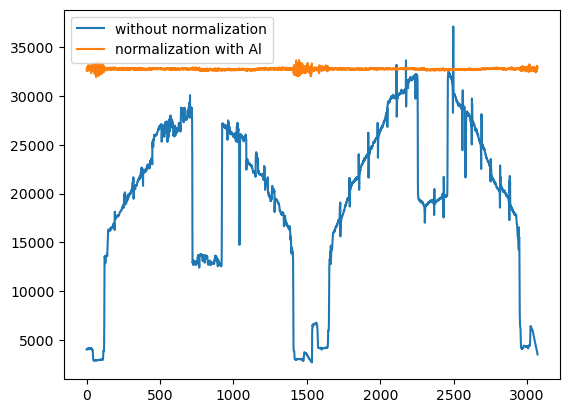

In [25]:
plt.plot(e0['Pixel'], e0['Average'], label = 'without normalization')
plt.plot(e1['Pixel'], e1['Average'], label = 'normalization with Al')
plt.legend()

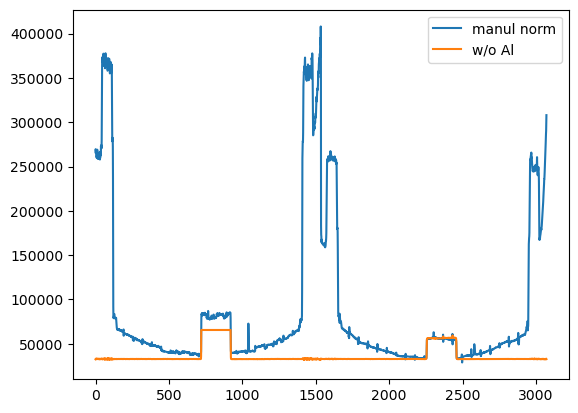

In [24]:
norm = 2**16*0.5/e0['Average']*e1['Average']
plt.plot(e2['Pixel'], norm, label = 'manul norm')
plt.plot(e2['Pixel'], e2['Average'], label = 'w/o Al')
plt.legend()